# Irannian Leopard Population in Bamu National Park

### 99/11/15

Population contains two sex and two age categories; Female ang male, adult and subadult. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Data collected in Bamu Park has been given in the table:

|      | Female | Male |
| ---  |  ---   | ---  |
|Adults|    3   |   1  |
|Subadults|  1  |   1  |

For this model we define sex ratio as the ratio of male to female population and based on our assumptions it is constant during the time. We actually don't know the ratio of male to female newborns, but we are estimating the ratio by the ratio of total males to total females. total population contains adults and subadults.

\begin{equation}
sex ratio = P(new born = male) \approx \frac{male adults + male subadults}{adults + subadults} = \frac{2}{6}
\end{equation}


In [2]:
sex_ratio = 0.5 #2/6

adults    = [[1, 3]]
subadults = [[1, 1]]

In [3]:
p_give_birth = 1 #poisson distribution automatically gives zeros children sometimes

def born(parents, p_give_birth, lam):
    nm, nf = parents
    if nm != 0:
        who_gives_birth = np.random.uniform(0, 1, nf)
        where = np.where(who_gives_birth <= p_give_birth)
        mothers = np.size(where)
        childs = np.random.poisson(lam, mothers)
        childs = np.sum(childs[childs <= 6])
    else:
        childs = 0
    determine_sex = np.random.uniform(0, 1, childs)
    where = np.where(determine_sex < sex_ratio)
    male_newborn   = np.size(where)
    female_newborn = childs - male_newborn
    newborn = [male_newborn, female_newborn]
    
    return newborn

In [4]:
def dy(adults, death_prob):
    nm, nf = adults
    nm = np.size(np.where(np.random.uniform(0, 1, nm) > death_prob))
    nf = np.size(np.where(np.random.uniform(0, 1, nf) > death_prob))
    return [nm, nf]


In [5]:
def evolution(adults, subadults, years, mean_life_time, puberty_age, p_give_birth, lam):
    death_prob     = 1 / mean_life_time

    total_subadults = subadults
    for year in range(years):
#         print(year, adults)
        if year < (puberty_age - 1):
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
            new_adults = dy(adults[year], death_prob)
            adults    = np.concatenate((adults, [new_adults]), axis = 0)

        else:
            new_adults = dy(np.add(adults[year], subadults[0]), death_prob)
            adults = np.concatenate((adults, [new_adults]), axis = 0)
            subadults = np.delete(subadults, (0), axis = 0)
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
    
    return adults, total_subadults

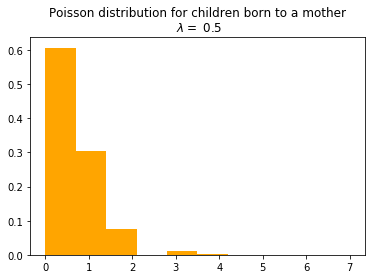

In [6]:
lam = 0.5
mothers = 10000000
myarray = np.random.poisson(lam, mothers)
weights = np.ones_like(myarray)/float(len(myarray))
plt.hist(myarray, color = 'orange', weights = weights)

plt.title(f"Poisson distribution for children born to a mother\n $\lambda = $ {lam}")
# plt.xlim(0, 10)

plt.savefig("poisson.png")

Wall time: 421 ms


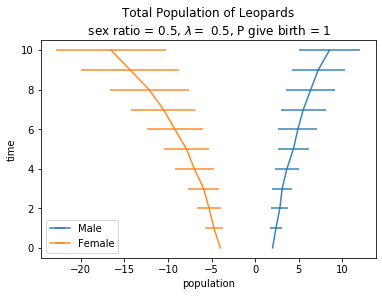

In [16]:
%%time

sex_ratio = 2/6
years = 10
puberty_age = 3
mean_life_time = 23
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100
adults, total_subadults = evolution(adults_0, subadults_0, years, mean_life_time, puberty_age, p_give_birth, lam)
males   = np.add(adults[:, 0], total_subadults[:, 0])
females = np.add(adults[:, 1], total_subadults[:, 1])

for ave in range(average_on):
    adults1, total_subadults1 = evolution(adults_0, subadults_0, years, mean_life_time, puberty_age, p_give_birth, lam)
    males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
    females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)
 

males   = males.reshape(-1, years+1)
females = females.reshape(-1, years+1)

males_m   = males.mean(axis = 0)
males_std = np.std(males, axis = 0)

females_m = females.mean(axis = 0) 
females_std = np.std(females, axis = 0)

time = np.arange(years + 1)

plt.errorbar(males_m, time, yerr = None, xerr = males_std, alpha = 0.9, label = 'Male')
plt.errorbar(-females_m, time, yerr = None, xerr = females_std, alpha = 0.9, label = 'Female')

plt.title(f"Total Population of Leopards\n sex ratio = {np.round(sex_ratio * 6/4, 2)}, $\lambda =$ {lam}, P give birth = {p_give_birth}")
plt.ylabel("time")
plt.xlabel("population")
plt.legend()
plt.savefig("evol1.png")

## Includig abnormal morality rate

In [9]:
def evolution_amorality(adults, subadults, years, mean_life_time, puberty_age, p_give_birth, lam, a_morality):
    death_prob     = 1 / mean_life_time + a_morality

    total_subadults = subadults
    for year in range(years):
#         print(year, adults)
        if year < (puberty_age - 1):
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
            new_adults = dy(adults[year], death_prob)
            adults    = np.concatenate((adults, [new_adults]), axis = 0)

        else:
            new_adults = dy(np.add(adults[year], subadults[0]), death_prob)
            adults = np.concatenate((adults, [new_adults]), axis = 0)
            subadults = np.delete(subadults, (0), axis = 0)
            subadults = np.concatenate((subadults, [born(adults[year], p_give_birth, lam)]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
    
    return adults, total_subadults

Wall time: 1.32 s


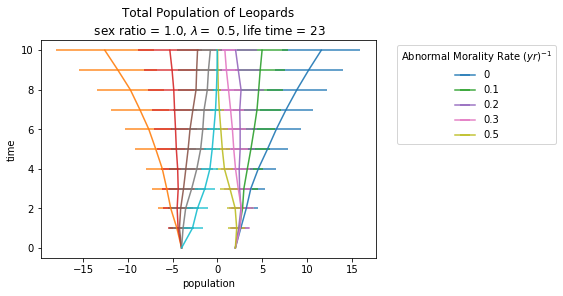

In [12]:
%%time

sex_ratio = 0.5
years = 10
puberty_age = 3
mean_life_time = 23
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100

for a_morality in [0, 0.1, 0.2, 0.3, 0.5]:
    adults, total_subadults = evolution_amorality(adults_0, subadults_0, years, mean_life_time,
                                                   puberty_age, p_give_birth, lam, a_morality)
    males   = np.add(adults[:, 0], total_subadults[:, 0])
    females = np.add(adults[:, 1], total_subadults[:, 1])

    for ave in range(average_on):
        adults1, total_subadults1 = evolution_amorality(adults_0, subadults_0, years, mean_life_time, 
                                              puberty_age, p_give_birth, lam, a_morality)
        males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
        females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)


    males   = males.reshape(-1, years+1)
    females = females.reshape(-1, years+1)

    males_m   = males.mean(axis = 0)
    males_std = np.std(males, axis = 0)

    females_m = females.mean(axis = 0) 
    females_std = np.std(females, axis = 0)

    time = np.arange(years + 1)

    plt.errorbar(males_m, time, yerr = None, xerr = males_std, alpha = 0.9, label = f"{a_morality}")
    plt.errorbar(-females_m, time, yerr = None, xerr = females_std, alpha = 0.9)

plt.title(f"Total Population of Leopards\n sex ratio = {np.round(sex_ratio * 2, 2)}, $\lambda =$ {lam}, life time = {mean_life_time}")
plt.ylabel("time")
plt.xlabel("population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Abnormal Morality Rate $(yr)^{-1}$')
plt.savefig("a_morality.png")

## Random choice instead of poisson

Not all matings lead to puppies and the probability to have 2 puppies is more than 1 and 3 and the other cases are too rare. In this case I am tuning the probabilities in "born choice" function. 

In [13]:
import random

def born_choice(parents):
    nm, nf = parents
    if nm != 0:
        childs = random.choices([0, 1, 2, 3], weights = [0.75, 0.04, 0.1, 0.01], k = nf) #probilities tuned
        childs = int(np.sum(childs))
    else:
        childs = 0
    determine_sex = np.random.uniform(0, 1, childs)
    where = np.where(determine_sex < sex_ratio)
    male_newborn   = np.size(where)
    female_newborn = childs - male_newborn
    newborn = [male_newborn, female_newborn]
    
    return newborn

In [14]:
def evolution_choice(adults, subadults, years, mean_life_time, puberty_age, p_give_birth, lam):
    death_prob     = 1 / mean_life_time

    total_subadults = subadults
    for year in range(years):
#         print(year, adults)
        if year < (puberty_age - 1):
            subadults = np.concatenate((subadults, [born_choice(adults[year])]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
            new_adults = dy(adults[year], death_prob)
            adults    = np.concatenate((adults, [new_adults]), axis = 0)

        else:
            new_adults = dy(np.add(adults[year], subadults[0]), death_prob)
            adults = np.concatenate((adults, [new_adults]), axis = 0)
            subadults = np.delete(subadults, (0), axis = 0)
            subadults = np.concatenate((subadults, [born_choice(adults[year])]), axis = 0)
            total_subadults = np.concatenate((total_subadults, [subadults.sum(axis = 0)]), axis = 0)
    
    return adults, total_subadults

Wall time: 603 ms


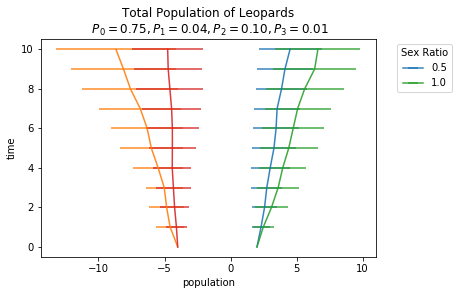

In [15]:
%%time

sex_ratio = 0.5
years = 10
puberty_age = 3
mean_life_time = 15
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100

for sex_ratio in [2/6, 4/6]:
    adults, total_subadults = evolution_choice(adults_0, subadults_0, years, mean_life_time,
                                                   puberty_age, p_give_birth, lam)
    males   = np.add(adults[:, 0], total_subadults[:, 0])
    females = np.add(adults[:, 1], total_subadults[:, 1])

    for ave in range(average_on):
        adults1, total_subadults1 = evolution_choice(adults_0, subadults_0, years, mean_life_time, 
                                              puberty_age, p_give_birth, lam,)
        males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
        females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)


    males   = males.reshape(-1, years+1)
    females = females.reshape(-1, years+1)

    males_m   = males.mean(axis = 0)
    males_std = np.std(males, axis = 0)

    females_m = females.mean(axis = 0) 
    females_std = np.std(females, axis = 0)

    time = np.arange(years + 1)

    plt.errorbar(males_m, time, yerr = None, xerr = males_std, alpha = 0.9, label = f"{np.round(sex_ratio * 6/4 , 2)}")
    plt.errorbar(-females_m, time, yerr = None, xerr = females_std, alpha = 0.9)

plt.title(f"Total Population of Leopards\n $P_0 = 0.75, P_1 = 0.04, P_2 = 0.10, P_3 = 0.01$")
plt.ylabel("time")
plt.xlabel("population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Sex Ratio')
plt.savefig("choice1.png")

An other distribution based on conditions of captivity

In [17]:
import random

def born_choice(parents):
    nm, nf = parents
    if nm != 0:
        childs = random.choices([0, 1, 2, 3], weights = [0.35, 0.25, 0.35, 0.05], k = nf) #probilities tuned
        childs = int(np.sum(childs))
    else:
        childs = 0
    determine_sex = np.random.uniform(0, 1, childs)
    where = np.where(determine_sex < sex_ratio)
    male_newborn   = np.size(where)
    female_newborn = childs - male_newborn
    newborn = [male_newborn, female_newborn]
    
    return newborn

Wall time: 610 ms


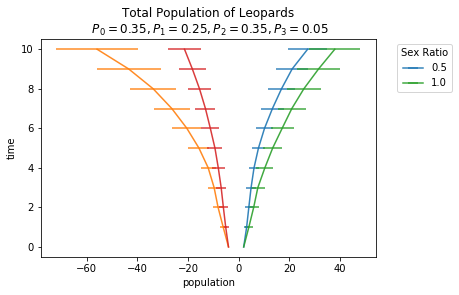

In [18]:
%%time

# sex_ratio = 0.5
years = 10
puberty_age = 3
mean_life_time = 23
p_give_birth = 1
lam = 0.5

adults_0    = [[1, 3]]
subadults_0 = [[1, 1]]

average_on = 100

for sex_ratio in [2/6, 4/6]:
    adults, total_subadults = evolution_choice(adults_0, subadults_0, years, mean_life_time,
                                                   puberty_age, p_give_birth, lam)
    males   = np.add(adults[:, 0], total_subadults[:, 0])
    females = np.add(adults[:, 1], total_subadults[:, 1])

    for ave in range(average_on):
        adults1, total_subadults1 = evolution_choice(adults_0, subadults_0, years, mean_life_time, 
                                              puberty_age, p_give_birth, lam,)
        males   = np.concatenate((males, np.add(adults1[:, 0], total_subadults1[:, 0])), axis = 0)
        females =  np.concatenate((females, np.add(adults1[:, 1], total_subadults1[:, 1])), axis = 0)


    males   = males.reshape(-1, years+1)
    females = females.reshape(-1, years+1)

    males_m   = males.mean(axis = 0)
    males_std = np.std(males, axis = 0)

    females_m = females.mean(axis = 0) 
    females_std = np.std(females, axis = 0)

    time = np.arange(years + 1)

    plt.errorbar(males_m, time, yerr = None, xerr = males_std, alpha = 0.9, label = f"{np.round(sex_ratio * 6/4, 2)}")
    plt.errorbar(-females_m, time, yerr = None, xerr = females_std, alpha = 0.9)

plt.title(f"Total Population of Leopards\n $P_0 = 0.35, P_1 = 0.25, P_2 = 0.35, P_3 = 0.05$")
plt.ylabel("time")
plt.xlabel("population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Sex Ratio')
plt.savefig("choice2c.png")